# Analyzing speed of light measurements - Michelson's Speed of Light Experiments

Based on the orginal paper: https://www.gutenberg.org/files/11753/11753-h/11753-h.htm from Albert A. Michelson, Master U.S. Navy. 1880
and on https://risk-engineering.org/notebook/data-analysis-speed-light.html

First Person to Measure Light ...

Albert A. Michelson, the scientist who famously conducted over 100 meticulous measurements of the speed of light, he was an American physicist known for his precision in experimental optics.


Michelson spent decades refining his measurements using rotating mirrors and improved setups:

1. Early Experiments (1878-1880s):

His first notable measurement (1878) used a rotating mirror apparatus (improving on Léon Foucault's design).

Result: 299,944 ± 51 km/s = [299,893;299,995], very close to today's accepted value which is 299,792 km/s. However, the real speed of light is not within 299,944 ± 51 km/s! is Michelson's Speed of Light Experiments? 

The speed of light in a vacuum is now defined as exactly 299,792,458 meters per second (m/s).


In [1]:
import pandas as pd
data = pd.read_html('https://www.gutenberg.org/files/11753/11753-h/11753-h.htm')
df = data[23]
df

,Date.,Distinctness of image.,"Temperature, Fahr.",Position of deflected image.,Position of slit.,Displacement of image in divisions.,Difference between greatest and least values.,B.,Cor.,Number of revolutions per second.,"Radius of measurement, in feet.",Value of one turn of the screw.,"Velocity of light in air, in kilometers.",Remarks.
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,July 1,2,86,2.14,135.145,133.00,0.08,1.467,-0.252,257.28,33.311,0.99627,299940,P.M. Mirror inverted.
96,July 2,3,86,99.85,0.400,99.45,0.05,1.450,-0.252,192.95,33.205,0.99606,299950,P.M. Mirror erect.
97,July 2,3,86,66.74,0.400,66.34,0.03,1.450,-0.252,128.63,33.205,0.99586,299800,P.M. Mirror erect.
98,July 2,3,86,50.16,0.400,47.96,0.07,1.467,-0.252,96.48,33.205,0.99580,299810,P.M. Mirror erect.


In [2]:
df[['Velocity of light in air, in kilometers.']].describe()

,"Velocity of light in air, in kilometers."
count,100.000000
mean,299852.400000
std,79.010548
min,299620.000000
25%,299807.500000
50%,299850.000000
75%,299892.500000
max,300070.000000


array([[<Axes: title={'center': 'Velocity of light in air, in kilometers.'}>]],
      dtype=object)

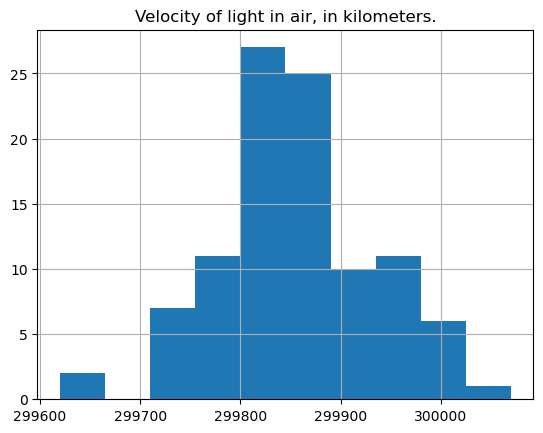

In [3]:
df[['Velocity of light in air, in kilometers.']].hist()

# Confidence interval using modern statistic - 2 standard deviations

In [24]:
df[['Velocity of light in air, in kilometers.']].mean()-2*df[['Velocity of light in air, in kilometers.']].std(), df[['Velocity of light in air, in kilometers.']].mean()+2*df[['Velocity of light in air, in kilometers.']].std()

(Velocity of light in air, in kilometers.    299694.378904
 dtype: float64,
 Velocity of light in air, in kilometers.    300010.421096
 dtype: float64)

# Confidence interval using modern statistic - Quantile 5% and 95%

In [35]:
df[['Velocity of light in air, in kilometers.']].quantile(0.05),df[['Velocity of light in air, in kilometers.']].quantile(0.95)

(Velocity of light in air, in kilometers.    299739.0
 Name: 0.05, dtype: float64,
 Velocity of light in air, in kilometers.    299980.0
 Name: 0.95, dtype: float64)

5th percentile from data: 299739.00
95th percentile from data: 299980.00
5th percentile from fitted normal: 299723.09
95th percentile from fitted normal: 299981.71


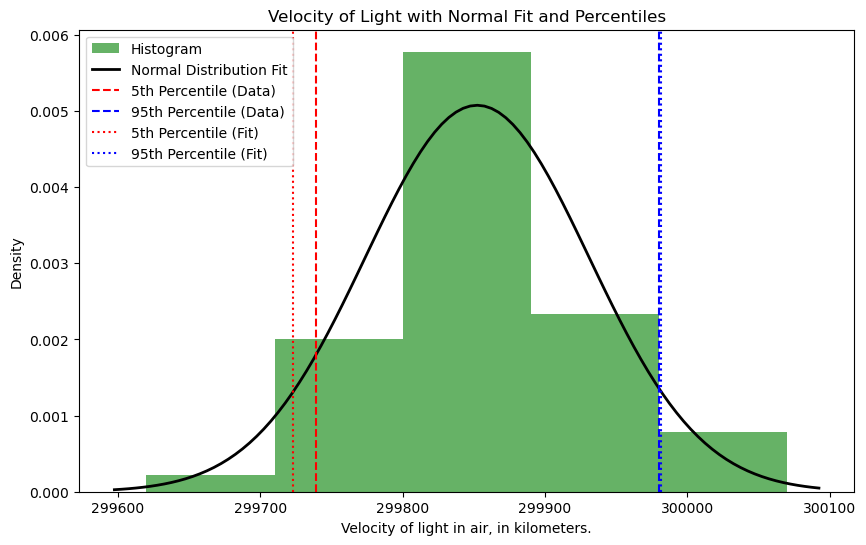

In [37]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Fit a normal distribution to the data
mu, std = stats.norm.fit(df['Velocity of light in air, in kilometers.'])

# Calculate the 5th and 95th percentiles from the data
fifth_percentile_data = df['Velocity of light in air, in kilometers.'].quantile(0.05)
ninetyfifth_percentile_data = df['Velocity of light in air, in kilometers.'].quantile(0.95)

# Calculate the 5th and 95th percentiles from the fitted normal distribution
fifth_percentile_fit = stats.norm.ppf(0.05, mu, std)
ninetyfifth_percentile_fit = stats.norm.ppf(0.95, mu, std)

print(f"5th percentile from data: {fifth_percentile_data:.2f}")
print(f"95th percentile from data: {ninetyfifth_percentile_data:.2f}")
print(f"5th percentile from fitted normal: {fifth_percentile_fit:.2f}")
print(f"95th percentile from fitted normal: {ninetyfifth_percentile_fit:.2f}")

# Plotting
plt.figure(figsize=(10, 6))

# Histogram
plt.hist(df['Velocity of light in air, in kilometers.'], bins=5, density=True, alpha=0.6, color='g', label='Histogram')

# Normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')

# Vertical lines for percentiles
plt.axvline(fifth_percentile_data, color='r', linestyle='--', label='5th Percentile (Data)')
plt.axvline(ninetyfifth_percentile_data, color='b', linestyle='--', label='95th Percentile (Data)')
plt.axvline(fifth_percentile_fit, color='r', linestyle=':', label='5th Percentile (Fit)')
plt.axvline(ninetyfifth_percentile_fit, color='b', linestyle=':', label='95th Percentile (Fit)')

plt.title('Velocity of Light with Normal Fit and Percentiles')
plt.xlabel('Velocity of light in air, in kilometers.')
plt.ylabel('Density')
plt.legend()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Calculate the mean and standard error
mean = np.mean(df['Velocity of light in air, in kilometers.'])
std_err = stats.sem(df['Velocity of light in air, in kilometers.'])

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = std_err * stats.t.ppf((1 + confidence_level) / 2, len(df) - 1)

# Calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(f"Mean: {mean:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): {confidence_interval}")


print(f"Mean: {mean:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): {mean:.2f} ± {margin_of_error:.2f}")

Mean: 299852.40
Confidence Interval (95.0%): (299836.722593167, 299868.07740683306)
Mean: 299852.40
Margin of Error: 15.68
Confidence Interval (95.0%): 299852.40 ± 15.68


In [32]:
import numpy
def bootstrap_confidence_intervals(data, estimator, percentiles, runs=10000):
    replicates = numpy.empty(runs)
    for i in range(runs):
        replicates[i] = estimator(numpy.random.choice(data, len(data), replace=True))
    est = numpy.mean(replicates)
    ci = numpy.percentile(replicates, percentiles)
    return (est, ci)

In [33]:
est, ci = bootstrap_confidence_intervals(df['Velocity of light in air, in kilometers.'], estimator=numpy.mean, percentiles=[2.5, 97.5])
est, ci

(np.float64(299852.33707), array([299836.9, 299868. ]))

In [34]:
est - ci[0], ci[1] - est

(np.float64(15.437069999985397), np.float64(15.66292999999132))

The first return value is the bootstrapped estimate of the mean, and the second return value is the 95% confidence interval. Given that the confidence interval is roughly symmetrical, we could report this measurement as

299,853 ± 15 km/s (95% CI) (very close to today's accepted value which is 299,792 km/s).

or as

299,8523 [299837, 299868] km/s (95% CI).

At the time, Michelson made a few corrections to his measurements to account for the influence of temperature, and accounting for a number of sources of uncertainty in his measurement method, reported his estimate of the speed of light in a vacuum as

299,944 ± 51 km/s (very close to today's accepted value which is 299,792 km/s).

The speed of light in a vacuum is now defined as exactly 299,792,458 meters per second (m/s).
